# K-means Algorithm

**Name**: ZHU GUANGYU  
**Student ID**: 20165953  
**Github Repo**: [assignment03]()  

---

## Clustering

the goal of *clustering* is to group or partition the vectors into *k* groups or clusters, with the vectors in each group close to each other.

the best clustering:
- can find the best slustering, if the representatives are fixed;
- can find the vest representatives, if the clustering is fixed.

We use a single number to judge a choice of clustering, along with a choice of the group. We define:

$$
J^{clust}=(||x_{1}-z_{c_{1}}||^{2}+ \cdots +||x_{N}-z_{c_{N}}||^{2})/N
$$

Here $x_{N}$ is vector, $z_{c_{N}}$ is correspond representatives. We call this value *energy* or *cost*.

### When representatives fixed

We assign each date vector $x_{i}$ to its nearest representatives. Since the representatives are fixed, we actually re-grouped vectors into different partitions. We have:
$$ ||x_{i}-z_{c_{i}}|| = \min_{j=1,\cdots\,k}||x_{i}-z_{c_{i}}|| $$ 

This gives us the minimum $J^{clust}$.

### When group assignment fixed

This means the element vectors of each group are fixed. We need to find the group representatives to minimize our cost $J^{clust}$.

Simply, choose the average of the vectros in its group:
$$ z_{j} = (1/|G_{j}|)\sum_{i\in G_{j}}x_{i}$$

since this makes the sum of distance between points and its representative minimum.

## *k*-means Algorithm

Previous two methods can help us get the best clustering. But the two methods are depend on each other. To solve this problem, we can use *k-means algorithm*.

*k-means algorithm*'s idea is simple. We repeatedly alternate between updating the group assignments, then updating the representatives. In each iteration we get a better $J^{clust}$ until the step does not change the choice.

Have to be aware of is k-means algorithm **cannot** guarantee that the partition it finds minimizes $J^{clust}$. Commonly, we run it several times with different initial representatives, and choose the one with the smallest cost.

There is another problem is to determin the optimal number of clusters (here is the *k*).  
If you have given number of clusters, that's fine. If you don't, there are few methods can help us:
- [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_%28clustering%29 )
- [The silhouette method](https://en.wikipedia.org/wiki/Silhouette_%28clustering%29)
- [Gap statistic](http://web.stanford.edu/~hastie/Papers/gap.pdf)

<class 'list'>
[array([0.5, 0. , 1. , 1. ]), array([0.50392157, 0.99998103, 0.70492555, 1.        ]), array([1.0000000e+00, 1.2246468e-16, 6.1232340e-17, 1.0000000e+00])]
centroids: 
[[1, 88], [56, 75], [36, 18]]
Energy: 
699.92
[1447.82, 705.38, 699.92, 699.92, 699.92]


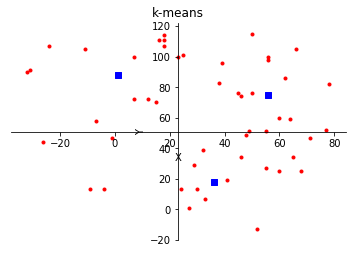

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import math


class KMeans:
    """k-means algorithm

    generate random 2d points,
    group these points into k clusters
    """

    def __init__(self, k=3, num_points=100, num_dims=2):
        self.k = k
        self.num_points = num_points
        self.num_dims = num_dims
        self.energy_history = []
        self.points = []
        self.centroids = []
        self.colors = list(cm.rainbow(np.linspace(0, 1, k)))
        self.clusters = []
        for _ in range(k):
            self.clusters.append([])
        

    def getEnergyHistory(self):
        return self.energy_history

    def getPoints(self):
        return self.points

    def getClusters(self):
        return self.clusters

    def getCentroids(self):
        return self.centroids

    def run(self):
        """Run algorithm

        Repeatly assign labels to points and compute new centroids.
        Iterate until the energy of the result not change.
        """

        previous_energy = 0
        energy = self._generatePointCluster()
        while(energy != previous_energy):
            previous_energy = energy
            self._assignLabel()
            # After re-grouping if there are any empty cluster, delete it from 
            # list also delete corresponding centroid.
            for i in range(len(self.clusters)):
                if (len(self.clusters[i]) == 0):
                    self.clusters.pop(i)
                    self.centroids.pop(i)
            self._computeCentroid()
            energy = self._computeEnergy()

    def plotGraph(self):
        """Plot current clustering result"""

        

    def _generatePoints(self):
        randoms = np.random.rand(self.num_points, self.num_dims)
        for x, y in randoms:
            point = [int(x*100), int(y*100)]
            self.points.append(point)

    def _initialLabel(self):
        for i in range(len(self.points)):
            index = i % self.k
            self.clusters[index].append(self.points[i])

    def _dispersePoints(self):
        # move each cluster's point with random offset
        for i in range(self.k):
            x_off = np.random.randint(-50, 50)
            y_off = np.random.randint(-50, 50)
            # x_off = np.random.randint(0, 10)
            # y_off = np.random.randint(0, 10)
            points_moved = []
            for x, y in self.clusters[i]:
                points_moved.append([x+x_off, y+y_off])
            self.clusters[i] = points_moved

        # update result back to points list
        new_points = []
        for i in range(self.k):
            for point in self.clusters[i]:
                new_points.append(point)
        self.points = new_points

    def _computeDistance(self, x, y):
        """Compute the distance between two points

        root of (x1-x2)^2 + (y1-y2)^2
        """

        a = np.array(x)
        b = np.array(y)

        return np.linalg.norm(a - b)

    def _computeCentroid(self):
        """ Compute each groups centroid then update self.controids """

        new_centroids = []
        for cluster in self.clusters:
            x_cod = [point[0] for point in cluster]
            y_cod = [point[1] for point in cluster]
            # there are may some clusters is empty
            # this means sometimes k != #clusters
            try:
                centroid_x = int(sum(x_cod)/len(x_cod))
                centroid_y = int(sum(y_cod)/len(y_cod))
                new_centroids.append([centroid_x, centroid_y])
            except:
                pass

        self.centroids = new_centroids

    def _assignLabel(self):
        """ Assign labels to points for generating new groups

        Compute distance between each point with each centroid,
        assign it to the closest centroid's group.
        """

        # self.points as object
        # for each point, compute the distance, get the closest centroid
        # generate k new cluster
        # no change to self.points and centroid (centroid fixed) 
        new_clusters = []
        for _ in range(len(self.clusters)):
            new_clusters.append([])

        for point in self.points:
            min = math.inf
            closest = 0
            # find the closest centroid
            for i in range(len(self.centroids)):
                dist = self._computeDistance(point, self.centroids[i])
                if dist < min:
                    min = dist
                    closest = i
            # put point into new group
            new_clusters[closest].append(point)

        self.clusters = new_clusters

    def _computeEnergy(self):
        """ Compute the cost of the clustering result

        Return:
            energy(float): the energy of this clustering.
        """

        energy = 0
        for i in range(len(self.centroids)):
            centroid = self.centroids[i]
            part_energy = 0
            for point in self.clusters[i]:
                part_energy += (
                    math.pow(self._computeDistance(point, centroid), 2)
                )
            energy += part_energy
        energy = energy / len(self.points)
        self.energy_history.append(energy)

        return energy

    def _generatePointCluster(self):
        """Generate random points

        1. Generate random points
        2. Randomly assgin label to each points
        3. Disperse points by cluster one more time
        4. Return the initial energy
        """

        self._generatePoints()
        self._initialLabel()
        self._dispersePoints()
        self._computeCentroid()

        return self._computeEnergy()


# plot function
def plot_points(cluster):
    """Plot given points

    Parameter:
        points: list of points
    """

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('k-means')
    for x, y in cluster.getPoints():
        plt.scatter(x, y, color='red', marker='.')

    for x, y in cluster.getCentroids():
        plt.scatter(x, y, color='blue', marker='s')

    ax = plt.gca()  # get current axis
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    plt.show()

if __name__ == '__main__':
    kmeans = KMeans(3, 50)
    kmeans.run()

    print('centroids: ')
    print(kmeans.getCentroids())
    print('Energy: ')
    print(kmeans._computeEnergy())
    print(kmeans.getEnergyHistory())

    plot_points(kmeans)